[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ooACuQR1szbxKso244j2UO-zDUungSMZ#scrollTo=I09zBXcloOr0)

# Problem 3

Use this notebook to write your code for problem 3.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import genfromtxt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline

## Load data

In [2]:
import requests

url_dict = {
    'problem3data.txt': 'https://drive.google.com/uc?export=download&id=1DPF-C43F2JuWxtHvkTP99w5r9QNHxd70',
}

def download_file(file_path):
    url = url_dict[file_path]
    print('Start downloading...')
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(file_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=1024 * 1024 * 1024):
                f.write(chunk)
    print('Complete')

In [3]:
train_file = 'problem3data.txt'
download_file(train_file)
train_data = genfromtxt(train_file, delimiter='\t')

y_train = train_data[:, 9]
X_train = train_data[:, :9]

Start downloading...
Complete


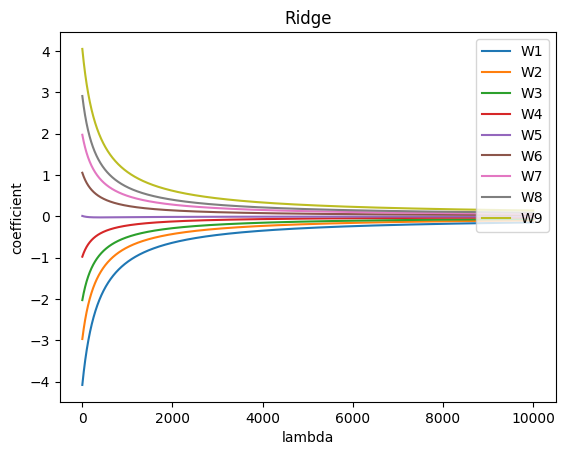

In [8]:
def train_ridge(X, y, lambdas):
    cof = []
    for lambda_ in lambdas:
        clf = Ridge(alpha=lambda_)
        clf.fit(X, y)
        cof.append(clf.coef_) 
    return cof

def train_lasso(X, y, lambdas):
    cof = []
    for lambda_ in lambdas:
        clf = Lasso(alpha=lambda_)
        clf.fit(X, y)
        cof.append(clf.coef_) 
    return cof

ridge_lambda = range(1, 10001)
lasso_lambda = np.linspace(0.01, 3, 30)

ridge_clf = train_ridge(X_train, y_train, ridge_lambda)
lasso_clf = train_lasso(X_train, y_train, lasso_lambda)

for i in range(len(ridge_clf[0])):
    plt.plot(ridge_lambda, [x[i] for x in ridge_clf], label=f'W{i+1}')

plt.legend(loc = 1)
plt.xlabel('lambda')
plt.ylabel('coefficient')
plt.title('Ridge')
plt.show()


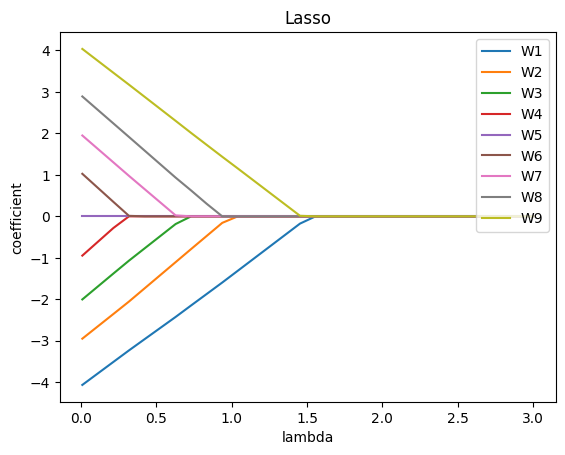

In [9]:
for i in range(len(lasso_clf[0])):
    plt.plot(lasso_lambda, [x[i] for x in lasso_clf], label=f'W{i+1}')

plt.legend(loc = 1)
plt.xlabel('lambda')
plt.ylabel('coefficient')
plt.title('Lasso')
plt.show()